## Laboratorio 2 Agrupacion 

Integrantes: Nicolás Arango (202220342), Amalia Carbonell (202122079), Mateo Rincón (202221402)

Este notebook se encuentra dividido en las siguientes secciones:

1. Preparacion de los datos 
2. Modelamiento 
3. Validacion cualitativa 
4. Validacion Cuantitativa 

### Preparacion de los datos 

In [36]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

In [37]:
data_df = pd.read_csv("202510_Laboratorio 2 - Agrupación_Customer_Data.csv",sep=';', encoding = "ISO-8859-1")

In [38]:
data_df.shape

(8950, 18)

In [39]:
data_df.head(5)

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
0,C10001,5323.148883,0.250693,26344.07220,38237.442520,3727.113162,15708.239680,0.496536,0.464442,0.821611,0.194502,100,77,16819.48004,21337.027460,39452.95812,0.817907,7
1,C10002,12726.638120,0.791307,37958.51902,5690.742440,18733.810960,38284.354430,0.699457,0.250327,0.654863,1.083902,78,156,15617.57058,8000.183624,63013.74848,0.343119,9
2,C10003,4305.572068,0.176531,28392.95334,36009.470090,2873.383232,14294.185030,0.419764,0.523662,0.899912,0.207049,72,81,15515.58621,27111.360490,NaN,0.829074,6
3,C10004,4740.988511,0.178076,27399.00384,38246.863490,3402.853375,6936.812518,0.439666,0.606597,0.783129,0.228299,78,83,12926.58797,23919.113400,38444.21998,0.883984,7
4,C10005,13820.920640,0.826914,42214.02163,7341.007821,19273.070990,40091.347850,0.821412,0.283579,0.501361,1.106350,88,182,14404.70507,6994.688474,62041.61734,0.383186,10


In [40]:
data_df.info

<bound method DataFrame.info of           ID         SALDO   F_SALDO       COMPRAS  COMPRAS_PUNTUALES  \
0     C10001   5323.148883  0.250693  26344.072200       38237.442520   
1     C10002  12726.638120  0.791307  37958.519020        5690.742440   
2     C10003   4305.572068  0.176531  28392.953340       36009.470090   
3     C10004   4740.988511  0.178076  27399.003840       38246.863490   
4     C10005  13820.920640  0.826914  42214.021630        7341.007821   
...      ...           ...       ...           ...                ...   
8945  C18946   6095.221156  0.234346  27094.007820       35917.204380   
8946  C18947  12682.575820  0.686025  38433.618850        5293.541956   
8947  C18948  16464.311410  0.189136   4296.196384       32554.759640   
8948  C18949  15531.883780  0.117118  12219.325650       31795.971700   
8949  C18950   5852.488566  0.166820  32480.936200       32368.357730   

      COMPRAS_PLAZOS  AVANCE_EFECTIVO  F_COMPRAS  F_COMPRAS_PUNTUALES  \
0        3727.1131

In [41]:
data_df.dtypes

ID                      object
SALDO                  float64
F_SALDO                float64
COMPRAS                float64
COMPRAS_PUNTUALES      float64
COMPRAS_PLAZOS         float64
AVANCE_EFECTIVO        float64
F_COMPRAS              float64
F_COMPRAS_PUNTUALES    float64
F_COMPRAS_PLAZOS       float64
F_AVANCE_EFECTIVO      float64
P_AVANCE_EFECTIVO        int64
P_COMPRAS                int64
LÍMITE_CREDITO         float64
PAGOS                  float64
PAGOS_MINIMOS          float64
F_PAGOS_COMPLETOS      float64
MESES_CLIENTE            int64
dtype: object

### Completitud 
Haremos un analisis de completitud para poder determinar si hay datos que tengan valores nulos en los datos. Podemos ver que hay 2 variables que no tienen una completitud del 100%, siengo pagos minimos y limite de credito. Reemplazaremos los valores nulos por las medias en cada uno de los conjuntos. 

In [42]:
analisisComplet =  (100 * data_df.isnull().sum() / data_df.shape[0]).sort_values(ascending=False)
pd.DataFrame({
    "Atributo": analisisComplet.index,
    "Completitud (%)": 100 - analisisComplet.values
})

,Atributo,Completitud (%)
0,PAGOS_MINIMOS,96.502793
1,LÍMITE_CREDITO,99.988827
2,ID,100.000000
3,SALDO,100.000000
4,F_PAGOS_COMPLETOS,100.000000
5,PAGOS,100.000000
6,P_COMPRAS,100.000000
7,P_AVANCE_EFECTIVO,100.000000
8,F_AVANCE_EFECTIVO,100.000000
9,F_COMPRAS_PLAZOS,100.000000


In [43]:
data_df['LÍMITE_CREDITO'].fillna(data_df['LÍMITE_CREDITO'].median(), inplace=True)
data_df['PAGOS_MINIMOS'].fillna(data_df['PAGOS_MINIMOS'].median(), inplace=True)

#data_df = data_df.dropna()


/var/folders/rx/2z7872sj27s0ywd3scyl9km80000gn/T/ipykernel_42573/3421392460.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df['LÍMITE_CREDITO'].fillna(data_df['LÍMITE_CREDITO'].median(), inplace=True)
/var/folders/rx/2z7872sj27s0ywd3scyl9km80000gn/T/ipykernel_42573/3421392460.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

### Unicidad 
Haremos un analisis de unicidad para verificar la cantidad de lineas duplicadas que tienen los datos. En este caso no hay datos duplicados. 

In [44]:
total_rows = data_df.shape[0]
total_rows
print(f"Cantidad de filas duplicadas: {(data_df.duplicated().sum())}")
print(f"Porcentaje de filas duplicadas: {(data_df.duplicated().sum()/total_rows)*100:.4f}%")

#star_df = data_df.drop_duplicates()

Cantidad de filas duplicadas: 0
Porcentaje de filas duplicadas: 0.0000%


### Validez 

Entre las variables del proyecto, se nos dice que F_SALDO', 'F_COMPRAS', 'F_COMPRAS_PUNTUALES', 'F_COMPRAS_PLAZOS' 'F_AVANCE_EFECTIVO', 'F_PAGOS_COMPLETOS' deben estar entre 1 y 0. 1 indicando que si compro son frecuencia y 0 si no compro con frecuencia. Las siguientes graficas nos permiten visualizar los valores que estas variables toman y si tenemos valores mayores a 1. Solo F_AVANCE_EFECTIVO tiene valores mayores a 1. 

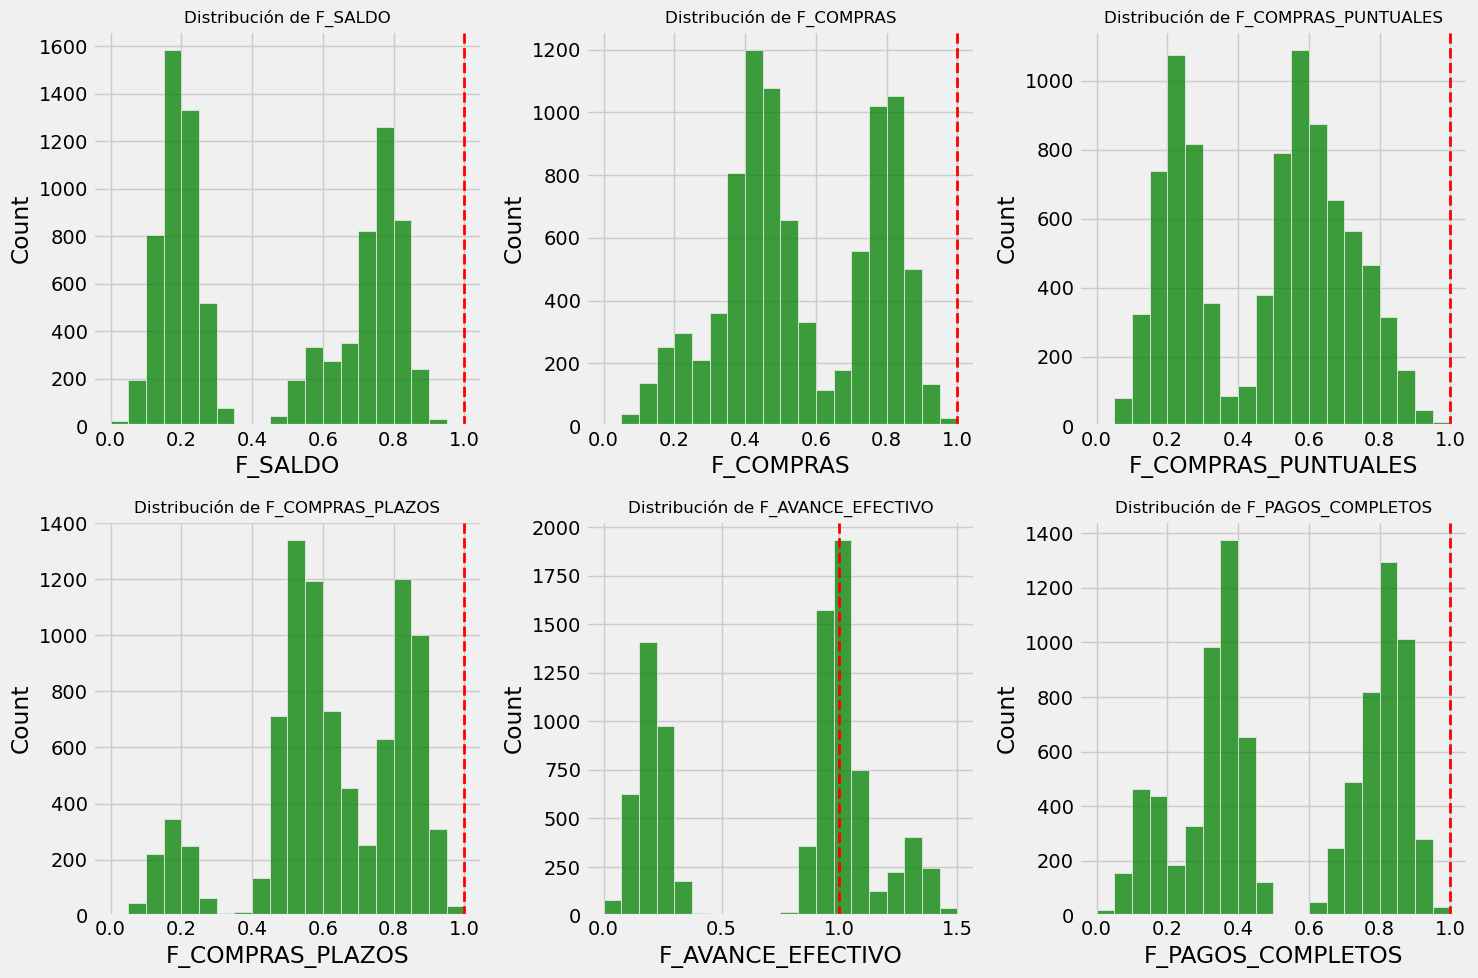

In [45]:

Col = ['F_SALDO', 'F_COMPRAS', 'F_COMPRAS_PUNTUALES', 'F_COMPRAS_PLAZOS', 
           'F_AVANCE_EFECTIVO', 'F_PAGOS_COMPLETOS']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(Col):
    sns.histplot(data_df[col], bins=20, color="green", ax=axes[i])  
    axes[i].axvline(x=1, color="red", linestyle="--", linewidth=2) 
    axes[i].set_title(f"Distribución de {col}", fontsize=12)

plt.tight_layout()
plt.show()


Analizaremos cuantos valores hay mayores a uno para identificar el correcto manejo que se les tiene que dar. 

In [46]:
num_errores = (data_df['F_AVANCE_EFECTIVO'] > 1).sum()
print(f"Número de registros fuera de rango: {num_errores}")
porcentaje= (num_errores/data_df.shape[0])*100
print ("Porcentaje de valores fuera de rango: " + str(porcentaje))


Número de registros fuera de rango: 3040
Porcentaje de valores fuera de rango: 33.96648044692737


Con un porcentaje del 34% son demasiados datos para ser eliminados por lo que los valores mayores a 1 seran reemplazados por 1 ya que 1 en este caso significa que si compro con frecuencia. Los reemplazaremos con la siguiente linea de codigo. 

In [47]:
data_df.loc[data_df['F_AVANCE_EFECTIVO'] > 1, 'F_AVANCE_EFECTIVO'] = 1

In [48]:
num_errores = (data_df['F_AVANCE_EFECTIVO'] > 1).sum()
print(f"Nuevo Número de registros fuera de rango: {num_errores}")
porcentaje= (num_errores/data_df.shape[0])*100
print ("Nuevo Porcentaje de valores fuera de rango: " + str(porcentaje))

Nuevo Número de registros fuera de rango: 0
Nuevo Porcentaje de valores fuera de rango: 0.0


### Escalamiento y analisis de datos  

Se analizarán las variables para identificar y tratar los valores atípicos, con el objetivo de mejorar la coherencia de los clusters y evitar que los datos extremos afecten la segmentación.

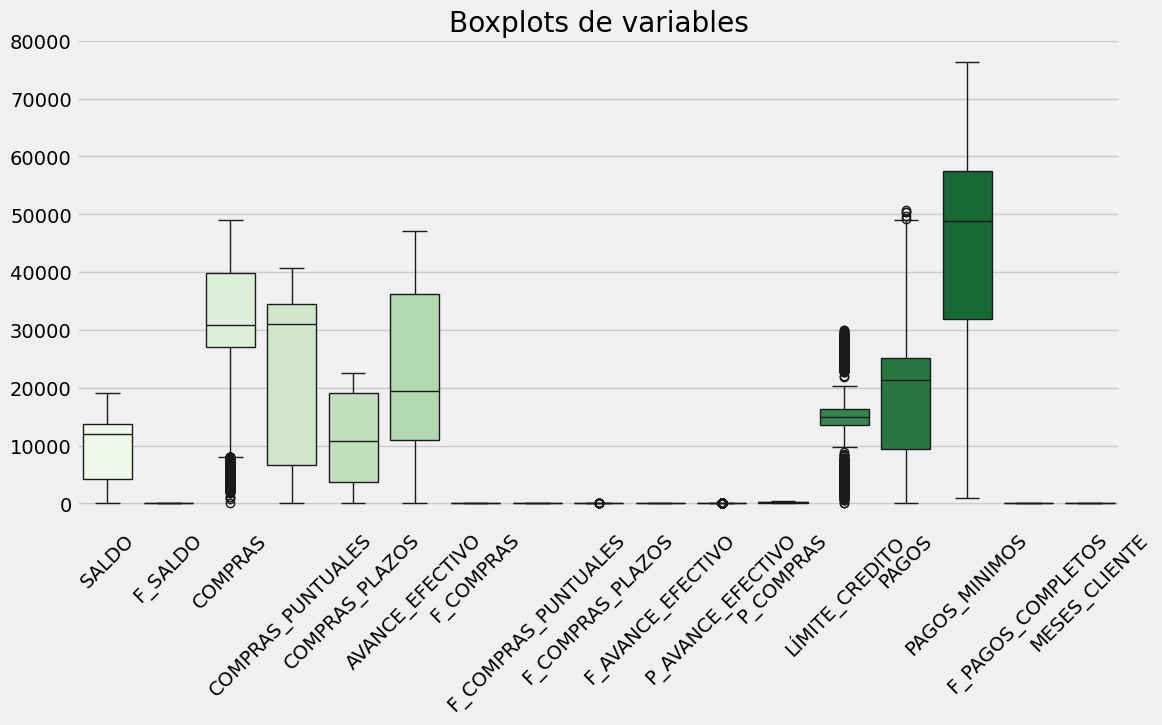

In [49]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_df[data_df.columns], palette="Greens")
plt.xticks(rotation=45)
plt.title("Boxplots de variables")
plt.show()


In [50]:
def contar_outliers_iqr(df):
    outliers_por_variable = {}
    
    for columna in df.select_dtypes(include=np.number): 
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
        outliers_por_variable[columna] = len(outliers)
    
    return outliers_por_variable

outliers = contar_outliers_iqr(data_df)
df_outliers = pd.DataFrame(outliers.items(), columns=["Variable", "Cantidad de Outliers"])
df_outliers
print(df_outliers)

               Variable  Cantidad de Outliers
0                 SALDO                     0
1               F_SALDO                     0
2               COMPRAS                   755
3     COMPRAS_PUNTUALES                     0
4        COMPRAS_PLAZOS                     0
5       AVANCE_EFECTIVO                     0
6             F_COMPRAS                     0
7   F_COMPRAS_PUNTUALES                     0
8      F_COMPRAS_PLAZOS                    19
9     F_AVANCE_EFECTIVO                     0
10    P_AVANCE_EFECTIVO                   253
11            P_COMPRAS                     0
12       LÍMITE_CREDITO                  2184
13                PAGOS                     5
14        PAGOS_MINIMOS                     0
15    F_PAGOS_COMPLETOS                     0
16        MESES_CLIENTE                     0


Cuando calculamos los outliers nos podemos dar cuenta que hay variables que tienen bastantes, en especial LIMITE_CREDITO con 2184. En este caso los outliers no se van a eliminar pues primero presentan un 24% de todos los datos y podria crear un sesgo. Adicionalmente, estos valores elevados del limite de credito puede mostrarnos algun patron significativo o inclusive un cluster de clientes mas adelante. 

Antes de poder escalar los datos se necesita eliminar la columna de ID pues en este caso no nos es util. 

In [51]:
data_df_numeric = data_df.drop(columns=['ID'])

### Escalar datos 

Se escalarán los datos para asegurar que todas las variables tengan la misma influencia en el análisis, evitando que aquellas con valores más grandes dominen el clustering. Para ello, se utilizará StandardScaler, que normaliza los datos con media 0 y desviación estándar 1.

In [52]:
print(data_df_numeric.dtypes)

SALDO                  float64
F_SALDO                float64
COMPRAS                float64
COMPRAS_PUNTUALES      float64
COMPRAS_PLAZOS         float64
AVANCE_EFECTIVO        float64
F_COMPRAS              float64
F_COMPRAS_PUNTUALES    float64
F_COMPRAS_PLAZOS       float64
F_AVANCE_EFECTIVO      float64
P_AVANCE_EFECTIVO        int64
P_COMPRAS                int64
LÍMITE_CREDITO         float64
PAGOS                  float64
PAGOS_MINIMOS          float64
F_PAGOS_COMPLETOS      float64
MESES_CLIENTE            int64
dtype: object


In [53]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_df_numeric), columns=data_df_numeric.columns)

data_scaled.head()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
0,-0.793157,-0.736841,-0.378759,1.128976,-1.083823,-0.545137,-0.295615,-0.061255,0.949565,-1.319478,1.070583,-1.233650,0.383424,0.136663,-0.323927,1.018938,-0.780560
1,0.653451,1.173579,0.673198,-1.268896,1.033761,1.247530,0.652425,-1.026343,0.148646,0.822925,0.082249,-0.125935,0.166334,-1.068257,1.224332,-0.756449,0.358433
2,-0.991986,-0.998912,-0.193185,0.964831,-1.204293,-0.657421,-0.654292,0.205667,1.325661,-1.286106,-0.187296,-1.177563,0.147914,0.658347,0.289002,1.060697,-1.350057
3,-0.906908,-0.993452,-0.283211,1.129670,-1.129579,-1.241636,-0.561306,0.579486,0.764729,-1.229587,0.082249,-1.149519,-0.319713,0.369943,-0.390215,1.266023,-0.780560
4,0.867269,1.299407,1.058633,-1.147313,1.109855,1.391015,1.222197,-0.876465,-0.588652,0.822925,0.531492,0.238629,-0.052735,-1.159099,1.160450,-0.606625,0.927929


En la siguiente grafica podemos ver la nueva distribucion de las variables. En esta nueva estandarizacion la mayoria de las variables tienen una distribucion al rededor del 0 por lo que asumimos que la estandarizacion funciono. Alguna de las variables presentan valores atipicos que nos demuestra que hay clientes con comportamientos de compra extremos con variables como "COMPRAS", "P_AVANCE_EFECTIVO" y "LÍMITE_CREDITO". 

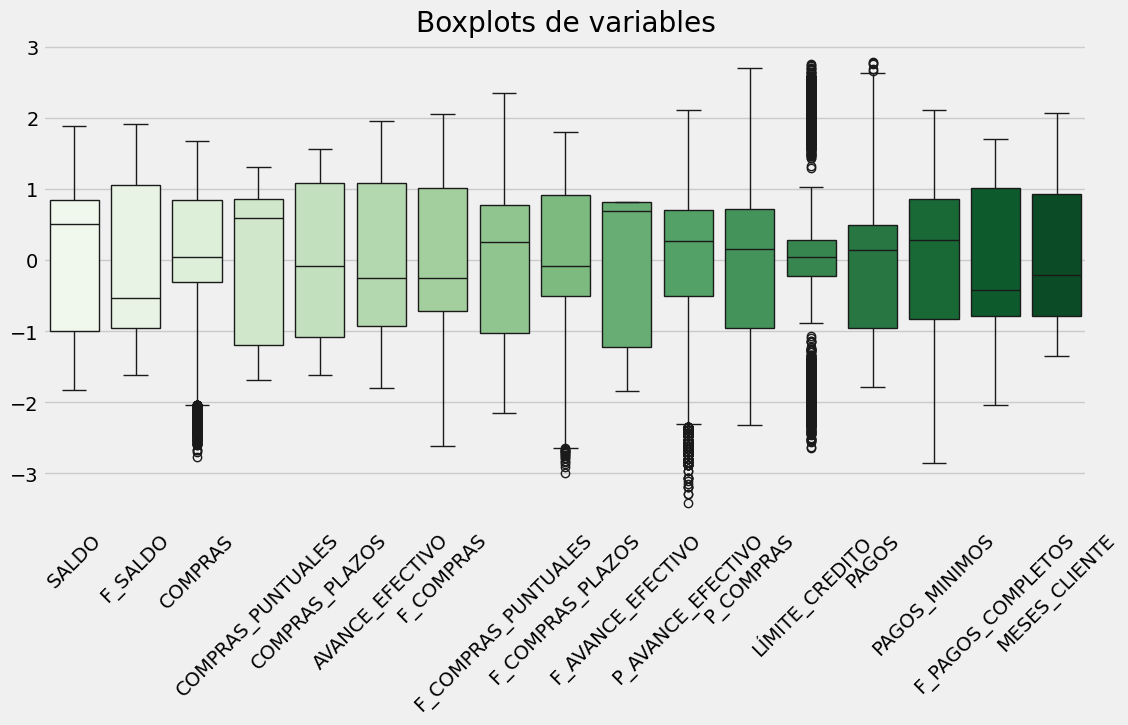

In [54]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_scaled[data_scaled.columns], palette="Greens")
plt.xticks(rotation=45)
plt.title("Boxplots de variables")
plt.show()

## Modelamiento 

Algoritmos aplicados: 
- Amalia Carbonell - K Means 
- Mateo Rincon -
- Nicolas Arango - 

### K Means 

Utilizaremos el algoritmo de K-Means para segmentar a los clientes por su comportameinto financiero y agruparlos en clusters. De esta manera identificaremos patrones de los datos. Para determinar el número óptimo de clusters, aplicaremos el método del codo, el valor de la silueta y las graficas de . El punto donde la grafica se vuelve menos pronunciada indica el número ideal de clusters. 

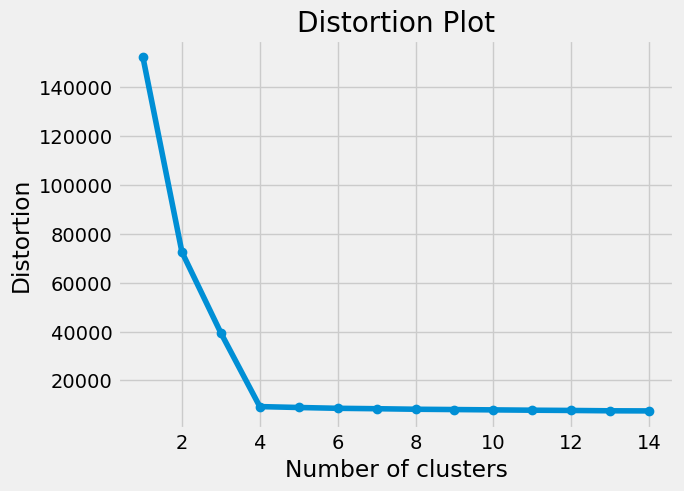

In [55]:
def plot_distortion(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Distortion',
                    xlabel = 'Number of clusters',
                    title = 'Distortion Plot'):
    distortions = []
    for i in range(k_min, k_max):
        km = KMeans(n_clusters=i,
                 init='k-means++',
                 n_init=10,
                 max_iter=300,
                 random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(k_min,k_max), distortions, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

plot_distortion(data_scaled[data_scaled.columns],1,15)

Con el metodo del codo nos damos cuenta que el mejor numero de clusters es 4. Lo plantearemos con 4 clusters pero igual analizaremos si esto podria mejorar. 

In [56]:
kmeans = KMeans(n_clusters=4, random_state=0) 
res_kmeans = kmeans.fit(data_scaled[data_scaled.columns])
res_kmeans.labels_

array([0, 1, 0, ..., 2, 2, 0], dtype=int32)

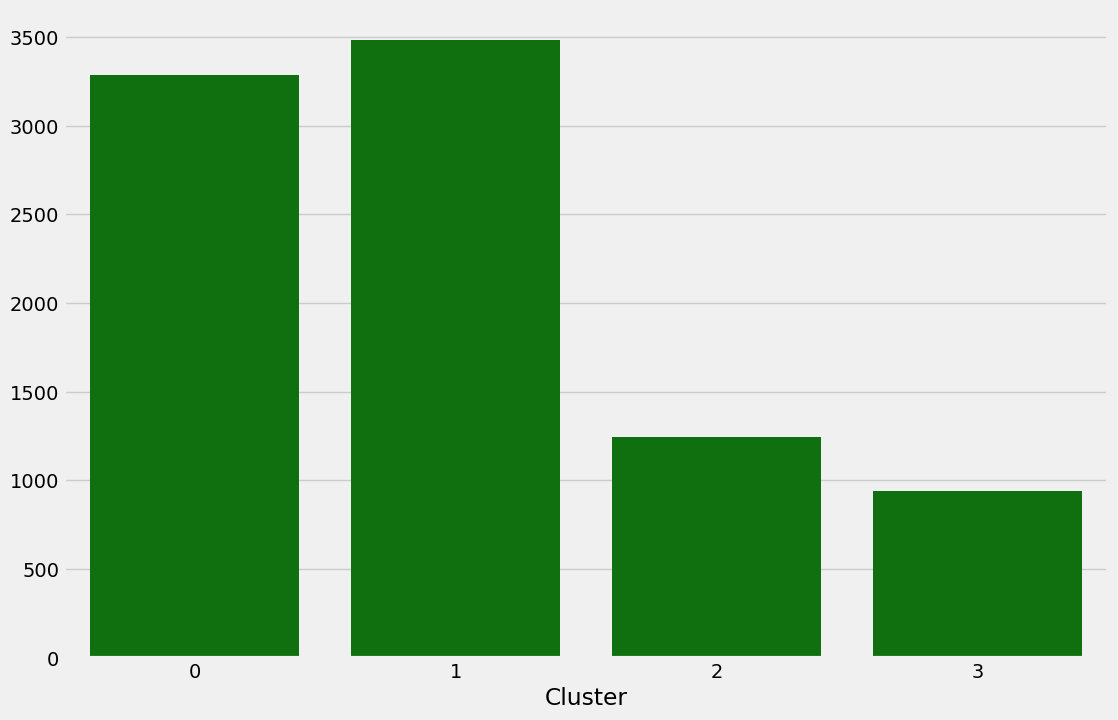

In [58]:
labels = res_kmeans.labels_
data_scaled['Cluster'] = labels

cluster_distrib = data_scaled['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color = 'green');


Visualizamos como se distribuyen los valores en los diferentes clusters con la grafica mostrada anteriormente. El cluster 0 y el 1 son los que mas valores toman. En la siguiente grafica podemos ver la cantidad de valores que hay en cada uno de los clusters. 

In [59]:
data_scaled.groupby('Cluster').count()


,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
Cluster,,,,,,,,,,,,,,,,,
0,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284,3284
1,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481
2,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
3,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938


In [60]:
cols_number = data_scaled.to_numpy()
cols_number

array([[-0.79315665, -0.73684059, -0.3787591 , ...,  1.01893777,
        -0.78056013,  0.        ],
       [ 0.65345113,  1.17357881,  0.67319846, ..., -0.75644908,
         0.3584328 ,  1.        ],
       [-0.99198648, -0.99891229, -0.19318539, ...,  1.06069728,
        -1.35005659,  0.        ],
       ...,
       [ 1.38377531, -0.9543688 , -2.37570566, ..., -1.55620595,
        -0.21106366,  2.        ],
       [ 1.20158324, -1.20886635, -1.65808253, ..., -1.71248651,
        -0.21106366,  2.        ],
       [-0.68972611, -1.03323094,  0.17707628, ...,  1.02671238,
        -0.78056013,  0.        ]])

In [61]:
#sns.pairplot(data=data_scaled, hue="Cluster")


In [62]:
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Grupos',
                   xlabel = "Coeficiente de silueta",
                   title = 'Gráfica de silueta'):
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()


Analizaremos el numero ideal de clusters que podria tener estos datos por medio de las graficas de siluetas. Se graficaran para valores de 2 a 7 clusters. Mostraremos la grafica y el silhouette score que nos permite analizar el modelo. Estamos buscando un valor cercano a 1 pues nos indica un buen modelo. 

Número de Clusters: 2, Silhouette Score: 0.527
[0 1]


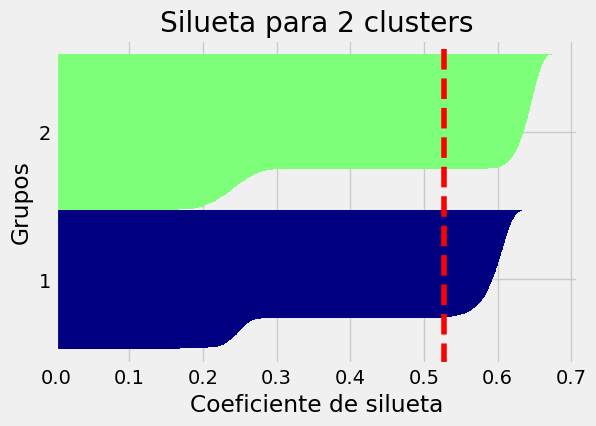

Número de Clusters: 3, Silhouette Score: 0.635
[0 1 2]


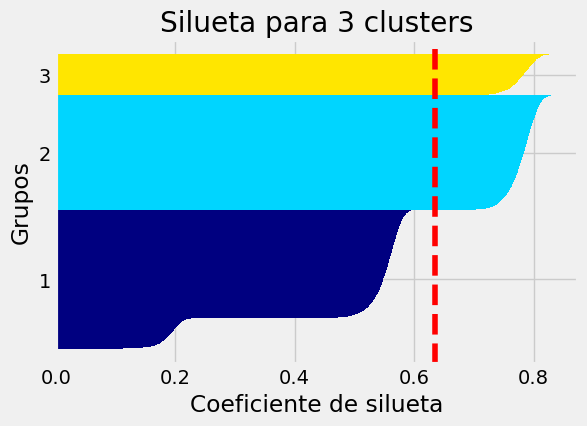

Número de Clusters: 4, Silhouette Score: 0.780
[0 1 2 3]


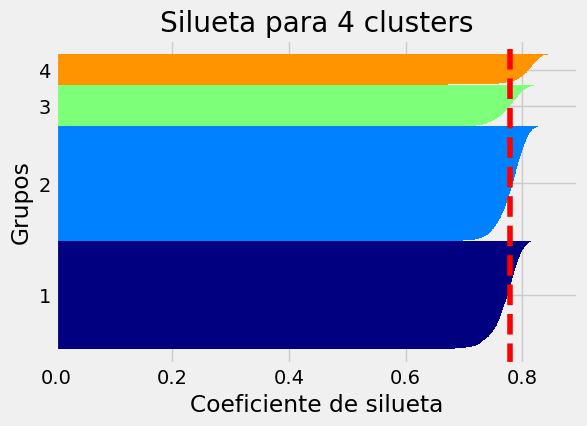

Número de Clusters: 5, Silhouette Score: 0.514
[0 1 2 3 4]


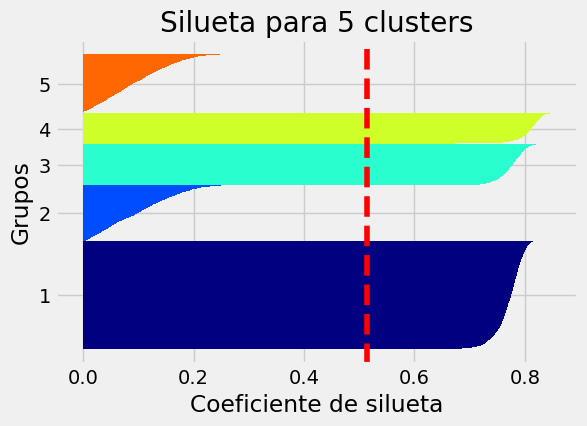

Número de Clusters: 6, Silhouette Score: 0.505
[0 1 2 3 4 5]


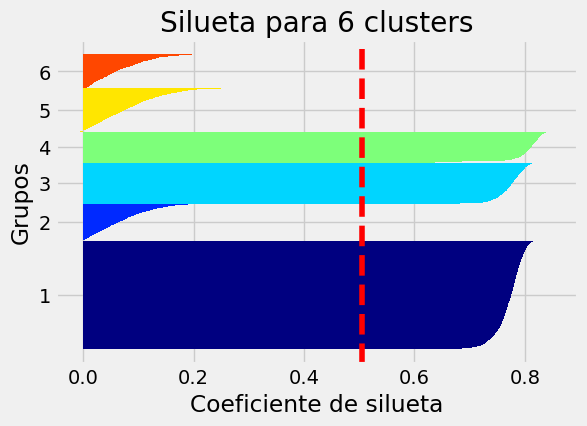

In [ ]:
for n_clusters in range(2, 7):  
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    print(f"Número de Clusters: {n_clusters}, Silhouette Score: {silhouette_score(data_scaled, cluster_labels):.3f}")
    plt.figure(figsize=(6, 4))
    plot_silhouette(data=data_scaled, labels=cluster_labels, title=f'Silueta para {n_clusters} clusters')

Vemos como las unicas graficas que tienen todos sus clusters arriba de la raya roja son las graficas de 4 y 2 clusters. Viendo los valores del silhouette score, la grafica de 2 clusters tiene un valor de 0,635 mientras que 4 clusters dan un valor de 0,78. Los 4 clusters tienen un valor mas cercano a 1, el cual nos identifica un buen modelo. 


In [64]:
def plot_selectK_silhoute(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Silhouette Coefficient',
                    xlabel = 'Number of clusters',
                    style = 'fivethirtyeight'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    # Crear una lista para almacenar los coeficientes de la silueta para cada valor de k analizado

    silhouette_coefficients = []

    # Notice you start at 2 clusters for silhouette coefficient
    for k in range(k_min, k_max):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_coefficients.append(score)
    plt.style.use(style)
    plt.plot(range(k_min, k_max), silhouette_coefficients)
    plt.xticks(range(k_min, k_max))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()    

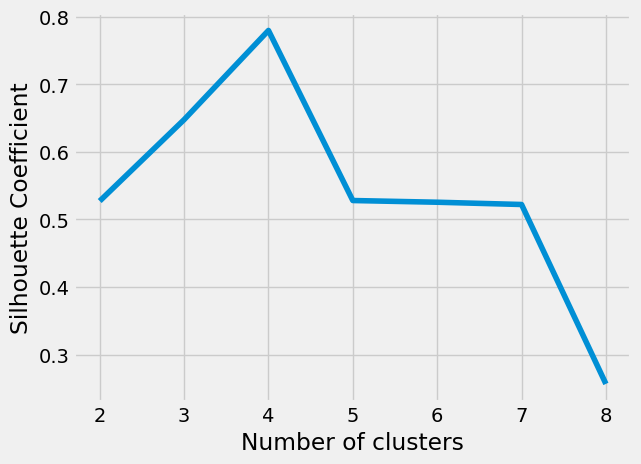

In [65]:
plot_selectK_silhoute(data_scaled,
                    k_min=2, 
                    k_max=9)

Hacemos un utlimo analisis para encontrar el numero ideal de clusters por medio del analisis de plot_selectK_silhoute. Este analisis, nos muestra los valores del coeficiente de la silueta. Podemos ver que este valor va aumentando hasta llegar a un maximo valor en 4 y despues disminuye. Esto nos indica que el mejor modelo, con el coeficiente mas cercano a 1 es el mejor modelo. 

Grafica de clusters 
En la siguiente grafica podemos ver de una manera grafica como se distribuyen los clusters con este modelo. Como mencionado aneriormente, el numero seleccionado como el numero ideal de clusters fue 4. Se vuelve a plantear el modelo y se muestra la grafica a continuacion. 

In [84]:
kmeans = KMeans(n_clusters=4, random_state=0) 
res_kmeans = kmeans.fit(data_scaled[data_scaled.columns])
res_kmeans.labels_

array([0, 1, 0, ..., 3, 3, 0], dtype=int32)

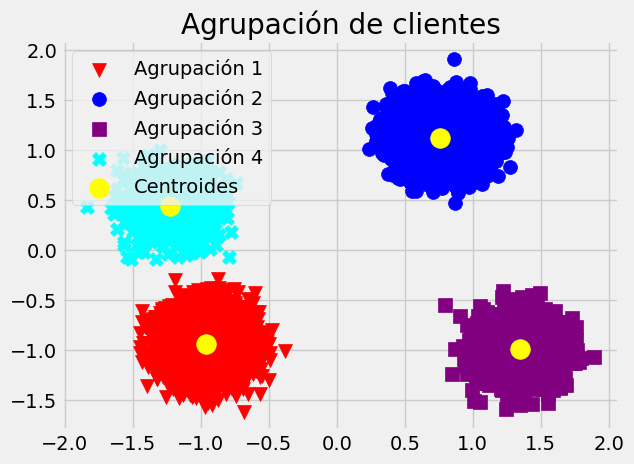

In [ ]:
# Ver gráficamente en dos dimensiones -de acuerdo con el análisis de la gráfica anterior- las diferentes agrupaciones para poderlas describir mejor
plt.scatter(cols_number[labels == 0, 0], cols_number[labels == 0, 1], s = 100, marker='v', c = 'red', label = 'Agrupación 1')
plt.scatter(cols_number[labels == 1, 0], cols_number[labels == 1, 1], s = 100, marker='o', c = 'blue', label = 'Agrupación 2')
plt.scatter(cols_number[labels == 2, 0], cols_number[labels == 2, 1], s = 100, marker='s', c = 'purple', label = 'Agrupación 3')
plt.scatter(cols_number[labels == 3, 0], cols_number[labels == 3, 1], s = 100, marker='X', c = 'cyan', label = 'Agrupación 4')

plt.scatter(res_kmeans.cluster_centers_[:, 0], res_kmeans.cluster_centers_[:, 1],  s=200, c='yellow', marker='o', label='Centroides')
plt.title('Agrupación de clientes')
plt.legend(loc='upper left')  
plt.show()

Los siguientes boxplots muestran la distribución de cada variable dentro de los distintos clusters obtenidos mediante la agrupación. Estas visualizaciones nos permiten analizar cómo se diferencian los grupos con respecto a cada variable y detectar posibles valores atípicos. En la mayoria de las variables podemos ver como cada uno de los clusters toma unos valores muy diferentes, mostrando claramente la division de cada uno de los grupos. Podemos observar la mediana, los cuartiles y los valores atípicos en cada cluster, lo que nos ayuda a identificar patrones y diferencias significativas entre los grupos. 

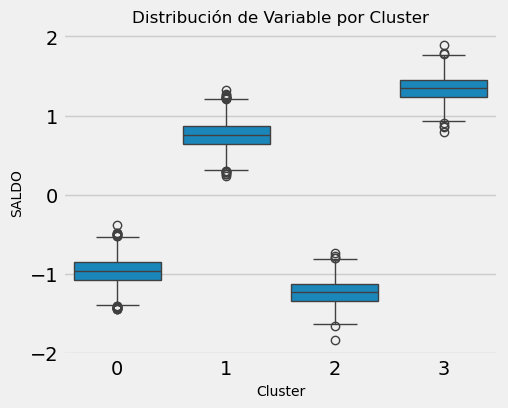

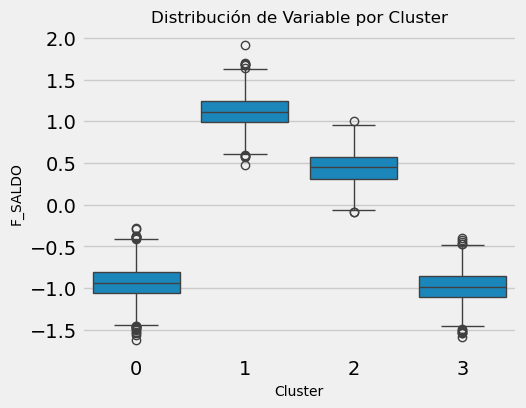

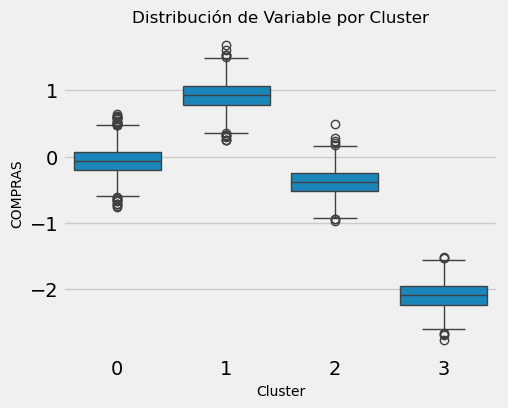

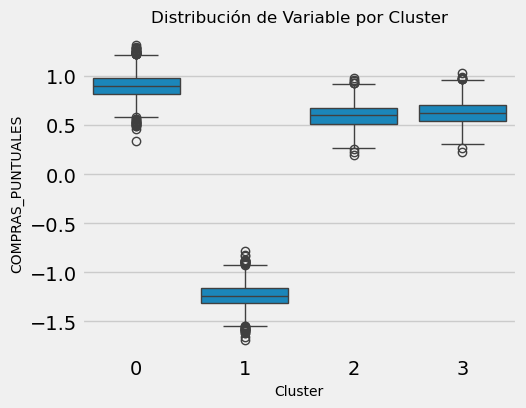

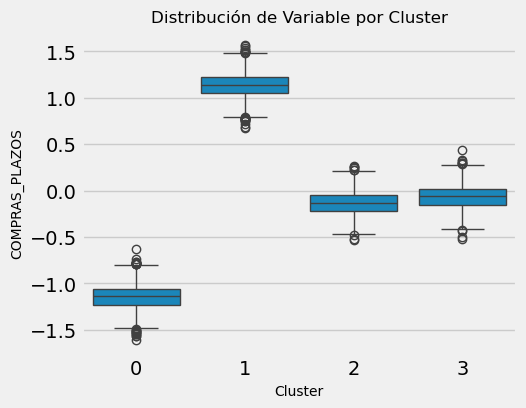

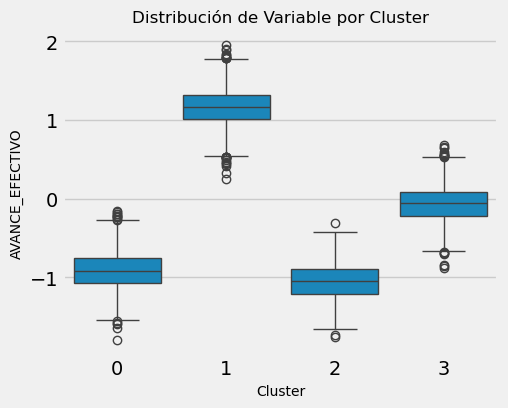

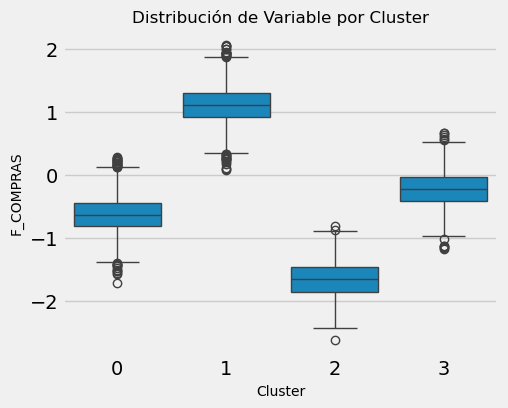

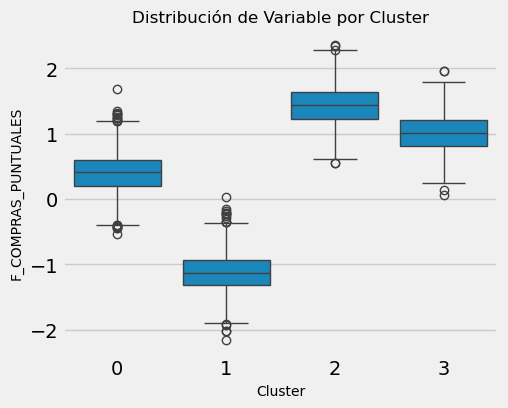

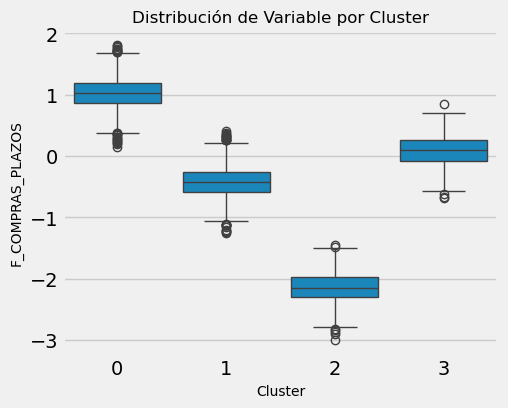

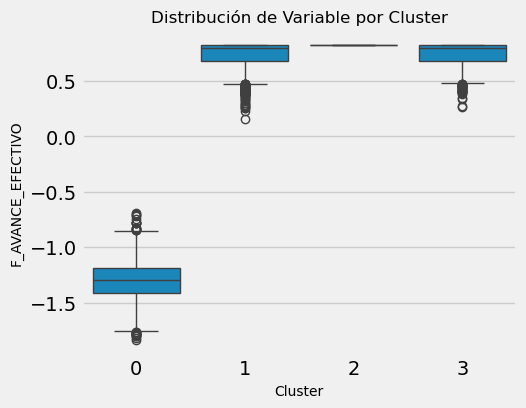

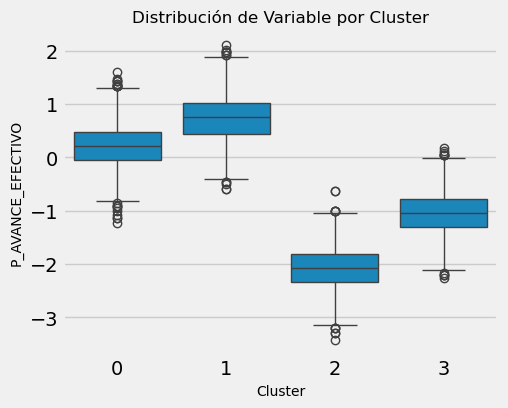

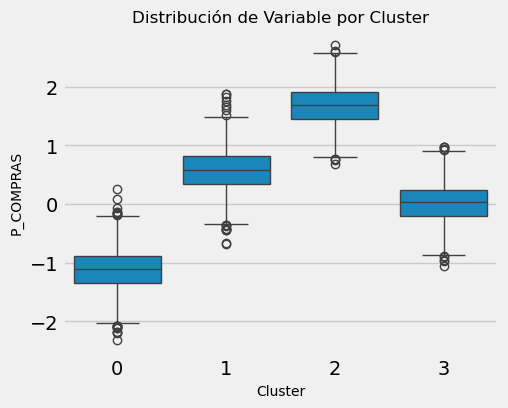

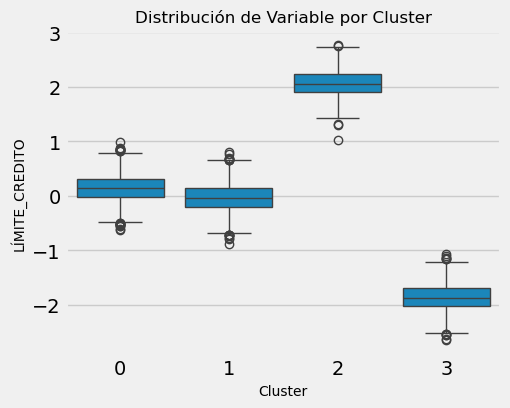

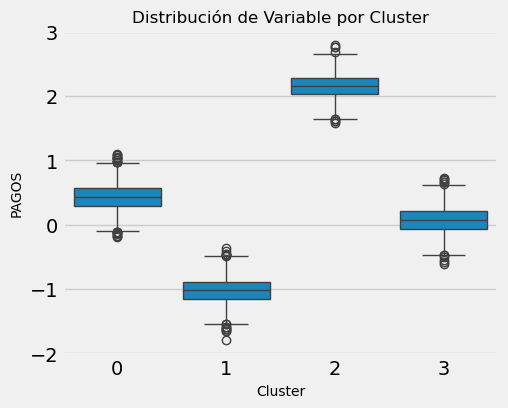

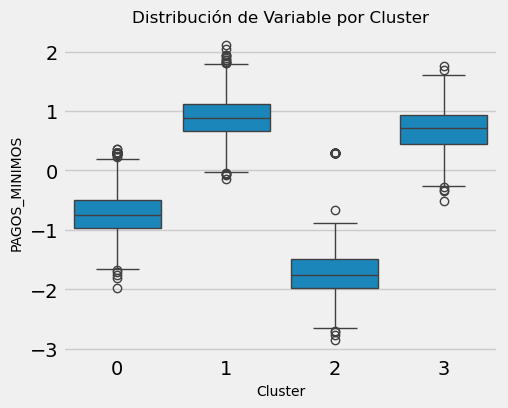

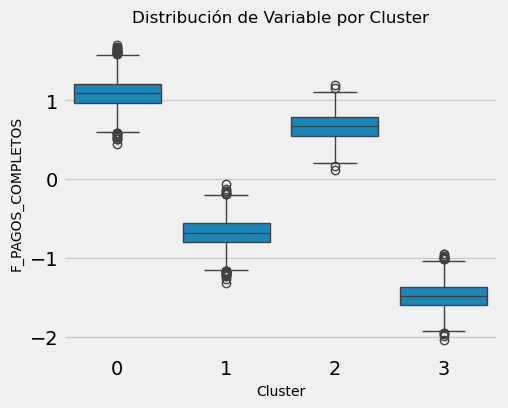

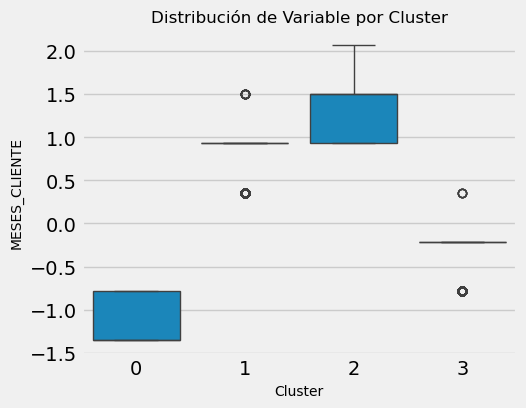

In [108]:
for col in data_scaled.columns:
    if col != 'Cluster':
        plt.figure(figsize=(5,4))
        sns.boxplot(x=data_scaled['Cluster'], y=data_scaled[col])  
        plt.title("Distribución de Variable por Cluster", fontsize=12)
        plt.xlabel("Cluster", fontsize=10)  
        plt.ylabel(col, fontsize=10)
        plt.show()

